In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from matplotlib.font_manager import fontManager, FontProperties
import ptitprince as pt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
import pingouin as pg
import statsmodels.api as sm
import language_tool_python as ltp
from PIL import Image
%matplotlib notebook
%matplotlib inline

def get_img(name):
    path = "font/emojis/{}.png".format(name)

    if name == 'Human':
        img = plt.imread(path)
    else:
        img = np.asarray(Image.open(path).resize((136, 128)))

    #  im = plt.imread(img)

    return img

def offset_image(coord, name, ax, size=0.5):
    img = get_img(name)
    im = OffsetImage(img, zoom=size)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -21.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)
    ax.add_artist(ab)

def raincloud(x, y, markersize, df, order=None, hue=None):
    # adding color
    pal = sns.color_palette()
    if df is not None:
        means = df.groupby([x])[y].mean().reindex(order)
    else:
        if len(order) > 2:
            raise Exception('Too many unique x values for this custom plot')

        mean_1 = np.mean([i[0] for i in zip(y, x) if i[1] == order[0]])
        mean_2 = np.mean([i[0] for i in zip(y, x) if i[1] == order[1]])
        means = [mean_1, mean_2]

    dodge = None
    if hue:
        means = df.groupby([x, hue])[y].mean().reindex(order)
        dodge = True
        
    sns.scatterplot(
        x=means.index,
        y=means,
        color='white',
        edgecolor='black',
        s=150/2, linewidth=1.5, zorder=4)

    ax = pt.half_violinplot(x=x, y=y, data=df, palette=pal, bw=.45, cut=0., linewidth=0,
                            scale="area", width=3, inner=None, orient='v', zorder=1, order=order, hue=hue, dodge=dodge)
    # pt.RainCloud(x=x, y=y, data=df, palette=pal, bw=.25, width_viol=.6, orient='v', zorder=2, order=order, hue=hue, dodge=dodge)

    ax = sns.stripplot(x=x, y=y, data=df, palette=pal, edgecolor="white",  linewidth=1, order=order,
                       size=markersize, orient='v', zorder=2, jitter=1, alpha=0.6, hue=hue, dodge=dodge)

    ax2 = sns.pointplot(x=x, y=y, data=df, color='black',  join=False, errorbar='se', linewidth=.8,
     edgecolor='black', capsize=.08, zorder=3, order=order, hue=hue, dodge=dodge)
    

/tmp/ipykernel_2451/3601513139.py:19: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')
/tmp/ipykernel_2451/3601513139.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby(['sub_id', 'source'], as_index=False).mean()


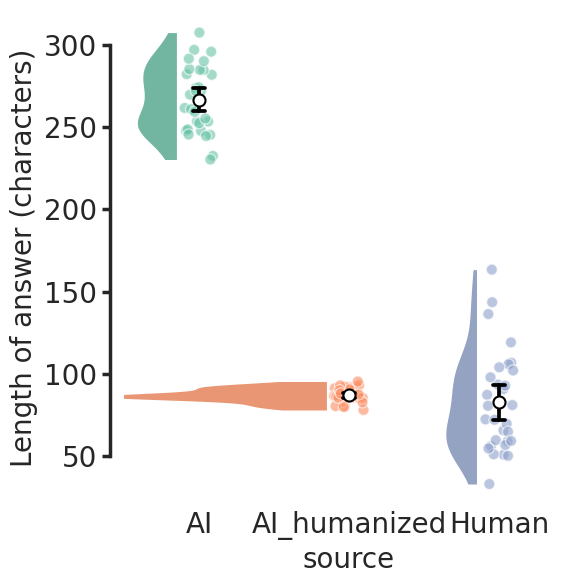

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd
import language_tool_python as ltp
import numpy as np

sns.set(
    rc={'figure.figsize':(6,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('Set2')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5



fname = './H+GPT3/dv2_all_final_disguise_mistakes_correct.csv'
df = pd.read_csv(fname)

# df = df[df.source=='AI']
df['len'] = df['lena1']
df['correctness'] = df['corra1']
df2 = df.copy()
df2['a1'] = df2['a2']
df2['len'] = df2['lena2']
df2['correctness'] = df2['corra2']
df2['source'] = 'AI_humanized'
df = pd.concat([df, df2])

df2 = df.groupby(['sub_id', 'source'], as_index=False).mean()
# all of the above in one line:
# sns.barplot(x='source', y='len', data=df)
raincloud(x='source', y='len', markersize=8, df=df2)
plt.ylabel('Length of answer (characters)')
# sns.barplot(x='source', y='len', data=df.groupby(['sub_id', 'source'], as_index=False).mean())

sns.despine(offset=10, trim=True, bottom=True);

# remove ticks length x axis
plt.tick_params(axis='x', which='both', length=0)

plt.tight_layout()

pg.ttest(df[df.source=='Human'].len, df[df.source=='AI_humanized'].len)   

plt.savefig('fig11.png', dpi=300)
# df = df.drop(columns=['a2', 'lena2', 'lena1', 'corra2', 'corra1', 'q2', 'len', 'correctness'])
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# df.to_csv('dv2_full_ai_2.csv')
# df.shape[0]
# plt.show()
# sns.barplot(x='source', y='len', data=df)



/tmp/ipykernel_2451/2173381585.py:19: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')
/tmp/ipykernel_2451/2173381585.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby(['sub_id', 'source'], as_index=False).mean()


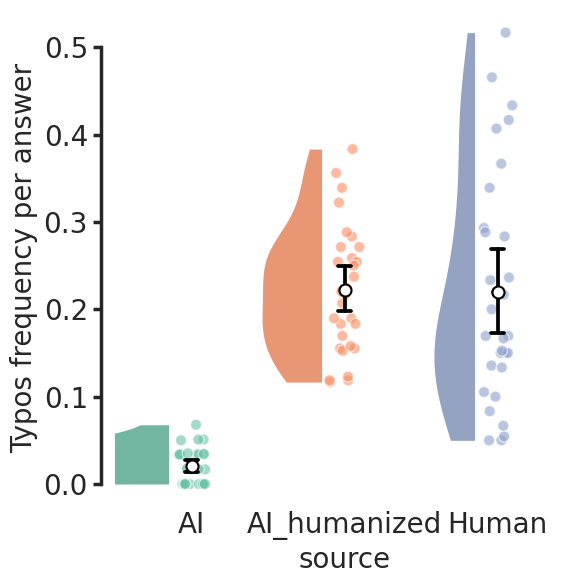

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd
import language_tool_python as ltp
import numpy as np

sns.set(
    rc={'figure.figsize':(6,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('Set2')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5



fname = './H+GPT3/dv2_all_final_disguise_mistakes_correct.csv'
df = pd.read_csv(fname)

# df = df[df.source=='AI']
df['len'] = df['lena1']
df['correctness'] = df['corra1']
df2 = df.copy()
df2['a1'] = df2['a2']
df2['len'] = df2['lena2']
df2['correctness'] = df2['corra2']
df2['source'] = 'AI_humanized'
df = pd.concat([df, df2])

df2 = df.groupby(['sub_id', 'source'], as_index=False).mean()
# all of the above in one line:
# sns.barplot(x='source', y='len', data=df)
raincloud(x='source', y='correctness', markersize=8, df=df2)
plt.ylabel('Typos frequency per answer')
# sns.barplot(x='source', y='len', data=df.groupby(['sub_id', 'source'], as_index=False).mean())

sns.despine(offset=10, trim=True, bottom=True);

# remove ticks length x axis
plt.tick_params(axis='x', which='both', length=0)

plt.tight_layout()

pg.ttest(df[df.source=='Human'].correctness, df[df.source=='AI_humanized'].correctness)   

# df = df.drop(columns=['a2', 'lena2', 'lena1', 'corra2', 'corra1', 'q2', 'len', 'correctness'])
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# df.to_csv('dv2_full_ai_2.csv')
# df.shape[0]
# plt.show()
# sns.barplot(x='source', y='len', data=df)
plt.savefig('fig12.png', dpi=300)
